In [2]:
import pandas as pd

In [3]:
df= pd.read_csv("Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.drop(columns=["Surname","RowNumber","CustomerId"],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
# transform geography, gender column into OHE

df= pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True, dtype=int)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [25]:
X=df.drop(columns=["Exited"])
y=df["Exited"]

In [26]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train.shape

(8000, 11)

In [28]:
X_test.shape

(2000, 11)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [83]:
class Model(nn.Module): #inharite from nn.module class to access the offereing of this class

  def __init__(self, num_features):# build a constructor and inside it we have to give how many features are in the input

    super().__init__()    #invoke/call parents class constructor
    self.fc1=nn.Linear(num_features,11)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(11,11)
    self.relu=nn.ReLU()
    self.fc3=nn.Linear(11,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,features):
    out=self.fc1(features)
    out=self.relu(out)
    out=self.fc2(out)
    out=self.relu(out)
    out=self.fc3(out)
    out=self.sigmoid(out)
    return out

In [84]:
model=Model(X_train_scaled.shape[1])

In [98]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# ------------------------------
# Convert numpy arrays → torch tensors
# ------------------------------
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32)

X_test_t = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32)

# ------------------------------
# Build model
# ------------------------------
model = Model(X_train_scaled.shape[1])

# Loss & optimizer
criterion = nn.BCELoss()                     # because output is sigmoid
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------
# Train loop
# ------------------------------
epochs = 2500
train_losses = []

for epoch in range(epochs):
    model.train()
    
    # forward pass
    y_pred = model(X_train_t)
    loss = criterion(y_pred, y_train_t)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())
    # print occasionally
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# ------------------------------


Epoch 10/2500, Loss: 0.7325
Epoch 20/2500, Loss: 0.7117
Epoch 30/2500, Loss: 0.6914
Epoch 40/2500, Loss: 0.6711
Epoch 50/2500, Loss: 0.6501
Epoch 60/2500, Loss: 0.6281
Epoch 70/2500, Loss: 0.6054
Epoch 80/2500, Loss: 0.5828
Epoch 90/2500, Loss: 0.5611
Epoch 100/2500, Loss: 0.5411
Epoch 110/2500, Loss: 0.5231
Epoch 120/2500, Loss: 0.5072
Epoch 130/2500, Loss: 0.4932
Epoch 140/2500, Loss: 0.4812
Epoch 150/2500, Loss: 0.4711
Epoch 160/2500, Loss: 0.4627
Epoch 170/2500, Loss: 0.4556
Epoch 180/2500, Loss: 0.4495
Epoch 190/2500, Loss: 0.4441
Epoch 200/2500, Loss: 0.4393
Epoch 210/2500, Loss: 0.4349
Epoch 220/2500, Loss: 0.4308
Epoch 230/2500, Loss: 0.4270
Epoch 240/2500, Loss: 0.4233
Epoch 250/2500, Loss: 0.4194
Epoch 260/2500, Loss: 0.4154
Epoch 270/2500, Loss: 0.4114
Epoch 280/2500, Loss: 0.4074
Epoch 290/2500, Loss: 0.4031
Epoch 300/2500, Loss: 0.3985
Epoch 310/2500, Loss: 0.3938
Epoch 320/2500, Loss: 0.3889
Epoch 330/2500, Loss: 0.3841
Epoch 340/2500, Loss: 0.3795
Epoch 350/2500, Loss: 0

In [104]:
# Evaluate
# ------------------------------
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_t)
    y_pred_labels = (y_pred_test > 0.5).float()  # convert prob → 0/1

accuracy = (y_pred_labels.eq(y_test_t).sum() / len(y_test_t)).item()
print(f"\nTest Accuracy: {accuracy:.4f}")

# ------------------------------
# Predict one example (optional)
# ------------------------------
print("\nExample prediction (probabilities):")
print(y_pred_test[:5])



Test Accuracy: 0.8610

Example prediction (probabilities):
tensor([[0.1826],
        [0.2594],
        [0.1271],
        [0.0861],
        [0.0701]])


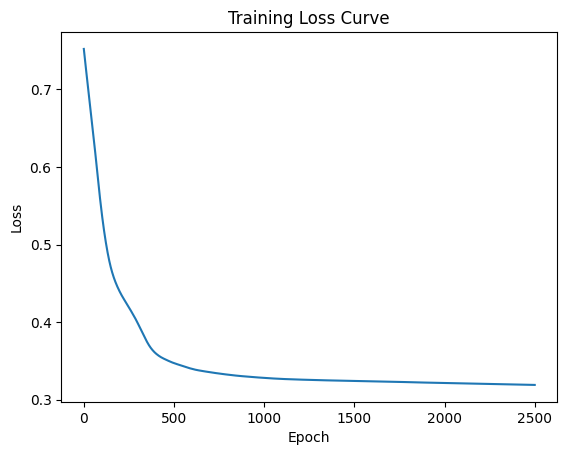

In [106]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
